In [1]:
import torch
torch.__version__

'1.10.2+cu102'

PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [2]:
torch.manual_seed(42)

Initializing memory for a tensor of shape (2, 3). This tensor will hold values which are already present in that memory slot as we haven't prodided any values to the tensor 

In [3]:
torch.Tensor(2, 3)

tensor([[ 5.0153e+26,  4.5643e-41,  5.0153e+26],
        [ 4.5643e-41, -1.0892e-32,  4.5642e-41]])

We can use the `random` module to create different kinds of tensor

In [4]:
torch.randn(2, 3)  # random normal distribution between 0 and 1

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])

In [5]:
torch.rand(2, 3)  # random uniform distribution distribution between 0 and 1

tensor([[0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])

In [6]:
torch.zeros(2, 3)  # zero tensor with shape (2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [7]:
torch.ones(2, 3)  # ones tensor with shape (2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [8]:
torch.arange(16)  # tensor with values between 0 , 1, ... , N

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [9]:
torch.tensor([1, 2, 3, 4])  # creating tensor from existing values

tensor([1, 2, 3, 4])

We can determine the shape of the tensor by checking out the `shape` attribute or calling `size()` method on a tensor

In [10]:
a = torch.Tensor(2, 3)
shape = a.shape
shape

torch.Size([2, 3])

In [11]:
a = torch.Tensor(2, 3)
size = a.size()
size

torch.Size([2, 3])

In [12]:
dim1, dim2 = size
print(f"Shape of the tesor: ({dim1}, {dim2})")

Shape of the tesor: (2, 3)


#### Numpy to Tensor

In [13]:
import numpy as np

In [14]:
np_a = np.arange(16).reshape(2, -1)
torch_a = torch.from_numpy(np_a)
torch_a.shape

torch.Size([2, 8])

#### Tensor to Numpy

In [15]:
np_b = torch_a.numpy()

In [16]:
np_b.shape

(2, 8)

### Operations on Torch Tensors

In [17]:
at = torch.rand(2, 3)
bt = torch.rand(2, 3)
at, bt

(tensor([[0.2666, 0.6274, 0.2696],
         [0.4414, 0.2969, 0.8317]]),
 tensor([[0.1053, 0.2695, 0.3588],
         [0.1994, 0.5472, 0.0062]]))

In [18]:
ct = at + bt

In [19]:
ct

tensor([[0.3719, 0.8969, 0.6284],
        [0.6407, 0.8441, 0.8378]])

In [20]:
0.6335 + 0.7249

1.3584

We can also use `in-place` operations to use memory efficiently. In-place operations are usually marked with a underscore postfix (e.g. “add_” instead of “add”).

In [21]:
bt.add_(at)

tensor([[0.3719, 0.8969, 0.6284],
        [0.6407, 0.8441, 0.8378]])

In [22]:
bt

tensor([[0.3719, 0.8969, 0.6284],
        [0.6407, 0.8441, 0.8378]])

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), …). In PyTorch, this operation is called `view`:

In [23]:
a = torch.arange(16)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [24]:
b = a.view(2, -1)  # -1 here means caculate this dimention value accordingly
a[0] = 1
b, b.shape  # view uses the same memory location but changes the metadata or shape attribute of the tensor

(tensor([[ 1,  1,  2,  3,  4,  5,  6,  7],
         [ 8,  9, 10, 11, 12, 13, 14, 15]]),
 torch.Size([2, 8]))

In [25]:
b.permute(1, 0)  # Swapping dimension 0 and 1

tensor([[ 1,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11],
        [ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]])

In [26]:
b.permute(1, 0).shape

torch.Size([8, 2])

### Other Operations

In [27]:
a = torch.Tensor(2, 3)
b = torch.Tensor(3, 4)
c = torch.matmul(a, b)  # matrix multiplication
c, c.shape

(tensor([[       inf, 2.2891e-14,        inf, 2.2891e-14],
         [2.2891e-14, 0.0000e+00, 2.2891e-14, 0.0000e+00]]),
 torch.Size([2, 4]))

In [28]:
a = torch.Tensor(2, 2, 3)
b = torch.Tensor(2, 3, 5)
print("input_shape", a.shape, b.shape)
c = torch.bmm(a, b)  # batch matrix multiplication
print("output", c.shape)

input_shape torch.Size([2, 2, 3]) torch.Size([2, 3, 5])
output torch.Size([2, 2, 5])


In [29]:
a = torch.randn(2, 3)
a

tensor([[-0.3267, -0.2788, -0.4220],
        [-1.3323, -0.3639,  0.1513]])

In [30]:
torch.einsum("ij->i", a)  # row wise sum

tensor([-1.0275, -1.5449])

In [31]:
torch.sum(a, axis=1)  # equivalent operation using sum method

tensor([-1.0275, -1.5449])

In [32]:
torch.einsum("ij->j", a)

tensor([-1.6590, -0.6427, -0.2706])

### Learning Einsum

In [33]:
a = torch.randn(2, 3)
a

tensor([[-0.3514, -0.7906, -0.0915],
        [ 0.2352,  2.2440,  0.5817]])

In [34]:
torch.einsum("ij->ji", a)  # permute axis

tensor([[-0.3514,  0.2352],
        [-0.7906,  2.2440],
        [-0.0915,  0.5817]])

In [35]:
torch.einsum("ij,kj->ik", a, a)  # matrix multiplication with itself with transposing

tensor([[ 0.7570, -1.9101],
        [-1.9101,  5.4291]])

In [36]:
torch.matmul(a, a.T)

tensor([[ 0.7570, -1.9101],
        [-1.9101,  5.4291]])

In [37]:
torch.einsum("ij->", a)  # sum of all the elements in the matrix

tensor(1.8272)

In [38]:
torch.sum(a)

tensor(1.8272)

In [39]:
torch.einsum("ij->i", a)  # row wise sum

tensor([-1.2336,  3.0608])

In [40]:
torch.einsum("ij->j", a)    # column wise sum. The axis you remove from output is the 
                            # one that will be summed

tensor([-0.1163,  1.4533,  0.4902])

In [41]:
torch.einsum("ij,ij->ij", a, a)

tensor([[0.1235, 0.6251, 0.0084],
        [0.0553, 5.0355, 0.3383]])

In [42]:
a * a, torch.pow(a, 2)

(tensor([[0.1235, 0.6251, 0.0084],
         [0.0553, 5.0355, 0.3383]]),
 tensor([[0.1235, 0.6251, 0.0084],
         [0.0553, 5.0355, 0.3383]]))

In [43]:
a = torch.randn(3)
b = torch.randn(5)
torch.einsum("i,j->ij", a, b)  # vector dot product

tensor([[ 0.2521,  0.0337,  0.3221, -0.2575,  0.5696],
        [ 0.3569,  0.0477,  0.4560, -0.3645,  0.8064],
        [ 0.2895,  0.0387,  0.3699, -0.2957,  0.6541]])

In [44]:
torch.matmul(a.reshape(3, -1), b.reshape(-1, 5))

tensor([[ 0.2521,  0.0337,  0.3221, -0.2575,  0.5696],
        [ 0.3569,  0.0477,  0.4560, -0.3645,  0.8064],
        [ 0.2895,  0.0387,  0.3699, -0.2957,  0.6541]])

If ever in doubt write for loops equivalent of the einsum equation and it will
be more clear what exactly is happening in the einsum operation 

### Dynamic Computation Graph and Backpropagation

Given an input x, we define our function by manipulating that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a computational graph. This graph shows how to arrive at our output from our input. PyTorch is a define-by-run framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

In [45]:
a = torch.ones(3)
a

tensor([1., 1., 1.])

In [46]:
a.requires_grad

False

In [47]:
a.requires_grad_(True)
a

tensor([1., 1., 1.], requires_grad=True)

Now we will use the following function to understand the computation graph concept
$$
y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right]
$$

In [48]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [49]:
a = x + 2  # gradient 1
b = a ** 2  # gradient 2a
c = b + 3  # gradient 1
y = c.mean()  # gradient 1/n where n in number of elements
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [50]:
y.backward()

In [51]:
x.grad  # total derivative 2a * 1/3

tensor([1.3333, 2.0000, 2.6667])

### Using GPU

In [52]:
torch.cuda.is_available()

True

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function .to(...), or .cuda(). However, it is often a good practice to define a device object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU

In [53]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [54]:
x = torch.randn(2, 3)
x.to(device)

tensor([[-1.5890, -1.1208,  0.8423],
        [ 0.1744, -2.1256,  0.9629]], device='cuda:0')

We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU

In [55]:
x = torch.randn(5000, 5000)

import time
## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to second

CPU time: 0.84269s
GPU time: 0.06384s


When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don’t want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU

In [56]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Simple Model: Continuous XOR

In [57]:
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super().__init__()
        self.linear_1 = nn.Linear(num_input, num_hidden)
        self.act = nn.Tanh()
        self.linear_2 = nn.Linear(num_hidden, num_output)

    def forward(self, x):
        x = self.act(self.linear_1(x))
        x = self.linear_2(x)
        return x

In [59]:
model = SimpleClassifier(2, 16, 1)
model

SimpleClassifier(
  (linear_1): Linear(in_features=2, out_features=16, bias=True)
  (act): Tanh()
  (linear_2): Linear(in_features=16, out_features=1, bias=True)
)

In [60]:
(list(model.named_parameters()))

[('linear_1.weight',
  Parameter containing:
  tensor([[-0.1023, -0.3531],
          [-0.0414,  0.5342],
          [ 0.1942, -0.1741],
          [ 0.3118, -0.1804],
          [-0.6646, -0.1598],
          [ 0.4744, -0.3836],
          [ 0.0289, -0.2287],
          [-0.0378, -0.3326],
          [ 0.4097,  0.0752],
          [ 0.3063,  0.5447],
          [-0.5917, -0.6492],
          [ 0.5285,  0.7030],
          [-0.4382,  0.6071],
          [-0.3100, -0.0824],
          [-0.3228,  0.1604],
          [ 0.4631, -0.5782]], requires_grad=True)),
 ('linear_1.bias',
  Parameter containing:
  tensor([-0.3415, -0.5719, -0.1429,  0.2499, -0.5831,  0.4253, -0.6200, -0.2649,
          -0.6535,  0.0574,  0.0306, -0.1815,  0.1023, -0.4663, -0.2078, -0.6975],
         requires_grad=True)),
 ('linear_2.weight',
  Parameter containing:
  tensor([[-0.1266,  0.2258,  0.2476,  0.0491,  0.2070,  0.0139,  0.1714, -0.2129,
            0.1887,  0.1777,  0.1908,  0.0680,  0.0568, -0.0152,  0.0196, -0.2133]],


In [61]:
for name, param in model.named_parameters():
    print(f"name: {name} and shape: {param.shape}")

name: linear_1.weight and shape: torch.Size([16, 2])
name: linear_1.bias and shape: torch.Size([16])
name: linear_2.weight and shape: torch.Size([1, 16])
name: linear_2.bias and shape: torch.Size([1])


### The Data

In [62]:
import torch.utils.data as data

In [63]:
class XOR_Dataset(data.Dataset):
    def __init__(self, shape, std=0.1):
        self.size = shape
        self.std = std
        self.create_dataset()

    def create_dataset(self):
        data = torch.randint(0, 2, (self.size, 2), dtype=torch.float32)
        label = (torch.sum(data, axis=1)==1).to(torch.long)
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        return self.size
    
    def __getitem__(self, index):
        return self.data[index], self.label[index]


In [64]:
xor_dataset = XOR_Dataset(200)
print(f"number of datapoints: {len(xor_dataset)}")
print(f"data point at [0]: {xor_dataset[0]}")

number of datapoints: 200
data point at [0]: (tensor([ 0.9084, -0.0419]), tensor(1))


In [65]:
import matplotlib.pyplot as plt
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()

    data_1 = data[label == 1]
    data_2 = data[label == 0]

    plt.figure(figsize=(8, 8))
    plt.scatter(data_1[:, 0], data_1[:, 1], label="Class 0")
    plt.scatter(data_2[:, 0], data_2[:, 1], label="Class 1")
    plt.title("Dataset Samples")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()


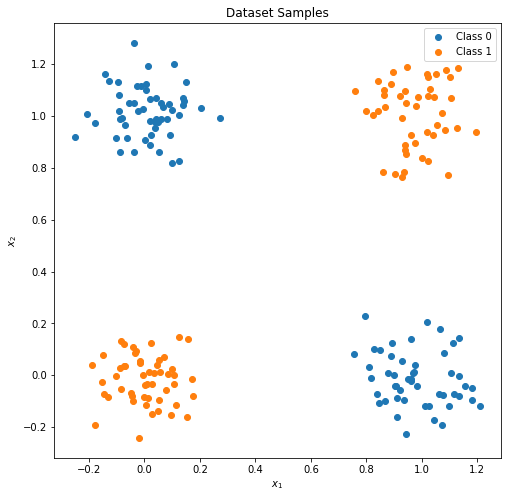

In [66]:
visualize_samples(xor_dataset.data, xor_dataset.label)

### The DataLoader Class

The class torch.utils.data.DataLoader represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch. In contrast to the dataset class, we usually don’t have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list here):

- **batch_size**: Number of samples to stack per batch

- **shuffle**: If True, the data is returned in a random order. This is important during training for introducing stochasticity.

- **num_workers**: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.

- **pin_memory**: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.

- **drop_last**: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

In [67]:
data_loader = data.DataLoader(xor_dataset, batch_size=8, shuffle=True, drop_last=True)


In [68]:
data_sample, label_sample = next(iter(data_loader))

(data_sample, label_sample,
data_sample.shape, label_sample.shape)

(tensor([[ 1.1961,  0.9384],
         [ 0.9472,  1.1881],
         [-0.0396, -0.0977],
         [ 0.0238,  0.1245],
         [ 0.9692,  0.0072],
         [-0.0961,  1.1331],
         [ 0.1236,  0.1485],
         [ 0.7973,  1.0201]]),
 tensor([0, 0, 0, 0, 1, 1, 0, 0]),
 torch.Size([8, 2]),
 torch.Size([8]))

### Optimization

In [69]:
loss_module = nn.BCEWithLogitsLoss()

In [70]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Training

In [71]:
train_dataset = XOR_Dataset(2500)
train_dataloader = data.DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

In [72]:
model.to(device)

SimpleClassifier(
  (linear_1): Linear(in_features=2, out_features=16, bias=True)
  (act): Tanh()
  (linear_2): Linear(in_features=16, out_features=1, bias=True)
)

In [82]:
from tqdm import tqdm
def train_model(model, data_loader, loss_fc, optimizer, num_epochs=100):
    model.train()

    for epoch in tqdm(range(num_epochs)):
        for data, label in data_loader:
            data = data.to(device)
            label = label.to(device)

            pred = model(data)
            pred = pred.squeeze(dim=1)

            loss = loss_fc(pred, label.float())
            
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

In [83]:
train_model(model, train_dataloader, loss_module, optimizer)

100%|██████████| 100/100 [00:02<00:00, 39.03it/s]


### Saving a Trained Model

In [84]:
state_dict = model.state_dict()

In [85]:
torch.save(state_dict, "model.tar")

### Loading a Saved Model

In [90]:
state_dict = torch.load("model.tar")

saved_model = SimpleClassifier(2, 16, 1)
saved_model.load_state_dict(state_dict)

<All keys matched successfully>

### Evaluation

In [89]:
test_data = XOR_Dataset(500)
test_data_loader = data.DataLoader(test_data, batch_size=128, shuffle=False, drop_last=False)

In [93]:
def evaluate_model(model, test_data_loader):
    model.eval()

    true_pred, total_pred = 0., 0.

    with torch.no_grad():
        for data, label in test_data_loader:
            pred = model(data)
            pred = pred.squeeze(dim=1)

            pred = torch.sigmoid(pred)

            pred_label = (pred >= 0.5).long()

            true_pred += (pred_label==label).sum()
            total_pred += data.shape[0]

    acc = true_pred/total_pred

    print(f"Accuracy: {100*acc:4.2f}%")

In [94]:
evaluate_model(saved_model, test_data_loader)

Accuracy: 100.00%


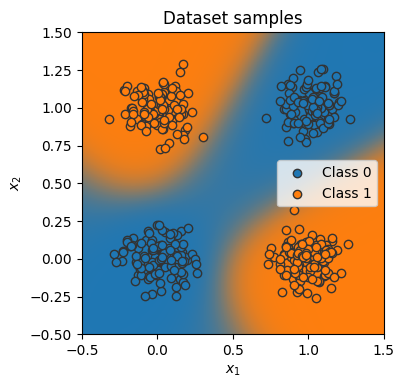

In [100]:
from matplotlib.colors import to_rgba
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(saved_model, test_data.data, test_data.label)

### Tensorboard Logging

In [101]:
from torch.utils.tensorboard import SummaryWriter

In [109]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    writer = SummaryWriter(logging_dir)

    model_plotted = False

    model.train()

    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data, label in data_loader:
            data = data.to(device)
            label = label.to(device)

            if not model_plotted:
                writer.add_graph(model, data)
                model_plotted = True

            pred = model(data)
            pred = pred.squeeze(dim=1)

            loss = loss_module(pred, label.float())
            optimizer.zero_grad()
            loss.backward()

            epoch_loss += loss.item()

            optimizer.step()

        epoch_loss /= len(data_loader)
        writer.add_scalar("Training_loss", epoch_loss, global_step=epoch + 1)
        
        if (epoch+1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)
            
    writer.close()
            

In [111]:
model = SimpleClassifier(2, 16, 1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_dataloader, loss_module, val_dataset=test_data)

100%|██████████| 100/100 [00:03<00:00, 26.14it/s]
